In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv(r'heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [7]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [8]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [9]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [10]:
# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [11]:
# Identify numerical and categorical columns
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
label_encoded_features = ['Sex', 'ExerciseAngina']
one_hot_encoded_features = ['ChestPainType', 'RestingECG', 'ST_Slope']

In [13]:
# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('label', OrdinalEncoder(), label_encoded_features),  # Use OrdinalEncoder for binary categorical features
        ('onehot', OneHotEncoder(drop='first'), one_hot_encoded_features)  # One-hot encode other categorical features
    ])

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Convert to DataFrame to see the final result
# Retrieve feature names after transformation for readability
onehot_encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_encoded_features)
column_names = numerical_features + label_encoded_features + list(onehot_encoded_columns)
X_transformed = pd.DataFrame(X_transformed, columns=column_names)

# Display the preprocessed data
X_transformed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ExerciseAngina,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [14]:
X_transformed.shape

(918, 14)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, 
                                                    test_size=0.20, 
                                                    random_state=47)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 14), (184, 14), (734,), (184,))

In [23]:
# n_samples = X_train.shape[0]

# indices = np.random.choice(n_samples, size=n_samples, replace=True)

# X_train.iloc[indices], y_train.iloc[indices]

In [ ]:

class RandomForestClassifierCustom(DecisionTreeClassifier):
    
    def __init__(self, n_estimators, criterion = "gini", splitter = "best", max_depth = None, min_samples_split = 2, min_samples_leaf = 1, 
                    min_weight_fraction_leaf = 0, max_features = None, random_state = None, max_leaf_nodes = None, 
                    min_impurity_decrease = 0, class_weight = None, ccp_alpha = 0):
        
        super().__init__(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, 
                            min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, 
                            max_features=max_features, random_state=random_state, max_leaf_nodes=max_leaf_nodes, 
                            min_impurity_decrease=min_impurity_decrease, class_weight=class_weight, ccp_alpha=ccp_alpha)
        
        self.n_estimators = n_estimators
        self.models = []  # to store all the trees
        
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        
        # sampling with replacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        
        return X.iloc[indices], y.iloc[indices]
    
    
    def fit(self, X, y):
        
        for _ in range(self.n_estimators):
            # create bootstrap samples
            X_sample, y_sample = self._bootstrap_sample(X, y)
            
            # initialize a decision tree
            model = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.max_features,
                min_samples_leaf=self.min_samples_leaf,
                min_samples_split=self.min_samples_split,
                criterion=self.criterion,
                max_leaf_nodes=self.max_leaf_nodes
            )
            
            model.fit(X_sample, y_sample)
            
            # save each tree
            self.models.append(model)
    
    
    def predict_proba(self, X):
        # collect probabilities from each tree
        all_probabilities = [tree.predict_proba(X) for tree in self.models]
        
        # average the probabilities across all trees
        avg_probabilities = np.mean(all_probabilities, axis=0)
        
        return avg_probabilities
    
    
    def predict(self, X):
        # get the averaged probabilities
        avg_probabilities = self.predict_proba(X)
        
        # choose the class with the highest probability
        return np.argmax(avg_probabilities, axis=1)

In [71]:
model1 = RandomForestClassifierCustom(
    n_estimators=100,
    max_depth=4,
    criterion='entropy',
    max_features='sqrt'
)

model1.fit(X_train, y_train)

In [72]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

y_train_proba = model1.predict_proba(X_train)
y_test_proba = model1.predict_proba(X_test)

y_train_pred.shape, y_test_pred.shape, y_train_proba.shape, y_test_proba.shape

((734,), (184,), (734, 2), (184, 2))

In [73]:
y_train_proba

array([[0.23477851, 0.76522149],
       [0.10489709, 0.89510291],
       [0.91121266, 0.08878734],
       ...,
       [0.19519735, 0.80480265],
       [0.39869698, 0.60130302],
       [0.39081536, 0.60918464]])

In [28]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [74]:
# classification report training
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       328
           1       0.86      0.93      0.89       406

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734



In [75]:
# classification report for test
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        82
           1       0.82      0.92      0.87       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [31]:
def plot_auc_roc_curve(y, y_proba):
    """
    Plots the AUC-ROC curve.

    Parameters:
    - y: array-like, true binary labels
    - y_proba: array-like, predicted probabilities for the positive class
    """
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(y, y_proba)
    print("AUC Score:", auc_score)

    # Plot the ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

AUC Score: 0.9486738555809204


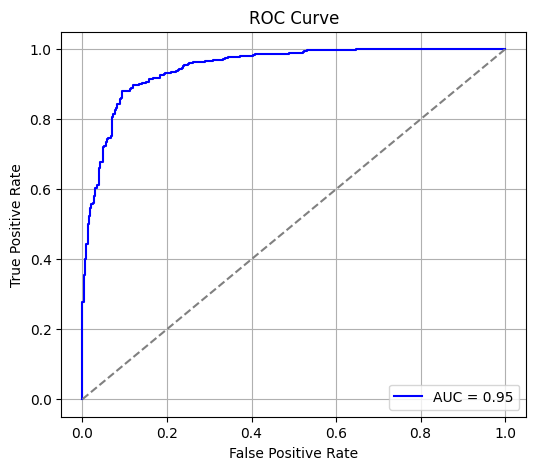

In [76]:
# train set
plot_auc_roc_curve(y=y_train, y_proba=y_train_proba[:, 1])

AUC Score: 0.9082974653275945


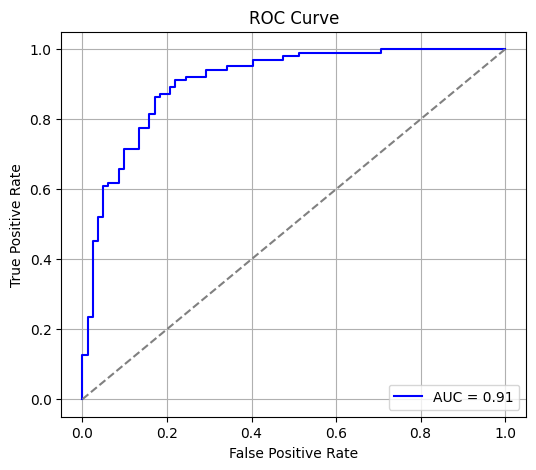

In [77]:
# test set
plot_auc_roc_curve(y=y_test, y_proba=y_test_proba[:, 1])

#### **Using `sklearn.ensemble` `RandomForestClassifier`**

In [78]:
model2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    criterion='entropy',
    max_features='sqrt',
    bootstrap=True
)

model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [79]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

y_train_proba = model2.predict_proba(X_train)
y_test_proba = model2.predict_proba(X_test)

y_train_pred.shape, y_test_pred.shape, y_train_proba.shape, y_test_proba.shape

((734,), (184,), (734, 2), (184, 2))

In [80]:
# classification report training
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       328
           1       0.86      0.93      0.89       406

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.88       734
weighted avg       0.88      0.88      0.88       734



In [81]:
# classification report for test
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        82
           1       0.81      0.93      0.87       102

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.84      0.84       184



AUC Score: 0.9506563138291481


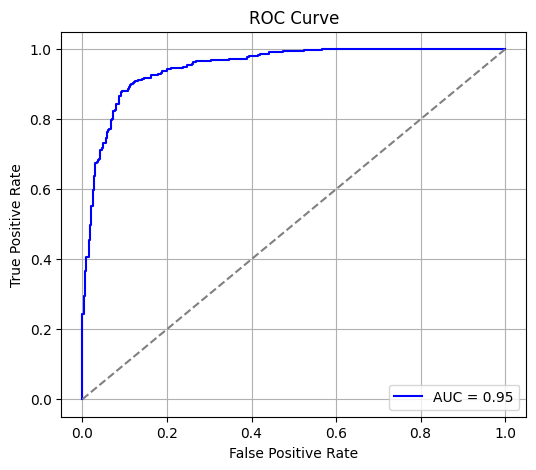

In [82]:
# train set
plot_auc_roc_curve(y=y_train, y_proba=y_train_proba[:, 1])

AUC Score: 0.9155906264945002


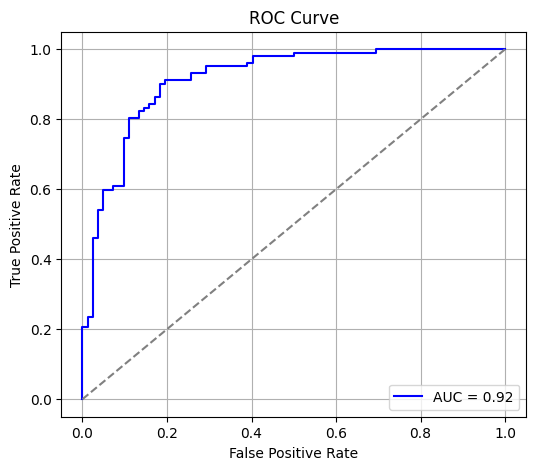

In [83]:
# test set
plot_auc_roc_curve(y=y_test, y_proba=y_test_proba[:, 1])